# Как город, образование, пол и тд влияет на кол-во увольнений у программистов

### Определяем цели для проекта
#### - Узнать в каких 3 городах живет большинство программистов
#### - Узнать с индексом каких городов живет большинство программистов 
#### - Распределить людей по гендеру и в каждом гендоре расчитать процент того, сколько людей хотят уволиться(распределить их по уровню образования дополнительно? также по опыту)
#### - Добавить визуализацию по важным метрикам

## Импортируем нужные библиотеки 

In [20]:
#! pip install Ipython
#! pip install matplotlib

In [23]:
import pandas as pd
import numpy as np
# Для визуализации
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('default')

from IPython.display import Markdown, display

In [24]:
# Делаем функцию для красивого вывода текста 

def printmd(string):
    display(Markdown(string))

# Ссылка на Dataset: 
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists/suggestions?status=pending&yourSuggestions=true

In [25]:
df = pd.read_csv(r"C:\Users\Sasha\OneDrive\Рабочий стол\archive\aug_train.csv")

# Информация по столбцам

###### enrollee_id : Unique ID for candidate.
###### city: City code.
###### city_ development _index : Developement index of the city (scaled).
###### gender: Gender of candidate
###### relevent_experience: Relevant experience of candidate
###### enrolled_university: Type of University course enrolled if any
###### education_level: Education level of candidate
###### major_discipline :Education major discipline of candidate
###### experience: Candidate total experience in years
###### company_size: No of employees in current employer's company
###### company_type : Type of current employer
###### last_new_job: Difference in years between previous job and current job
###### training_hours: training hours completed
###### target: 0 – Not looking for job change, 1 – Looking for a job change

In [26]:
# Знакомимся с таблицей
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


# 1 Проводим разведывательный анализ Датасета

In [27]:
# Смотрим на следующие аспекты датасета
# 1 Все ли колонки имеют нужный тип данных
# 2 Смотрим кол-во пропусков по таблице 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [28]:
# Вычисляем процент пропусков для каждой колонки 
df.isna().mean().sort_values(ascending = False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
relevent_experience       0.000000
city_development_index    0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

In [29]:
# Смотрим дубликаты и если они есть удаляем их, в данном случае дубликатов нет
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


# В каких городах живет большинство программистов 

In [30]:
# Добавляем dropna чтобы не потерять пустые значения и данные были достоверны
popular_city = df.groupby(by=df.city, dropna = False)['enrollee_id'].count().reset_index().sort_values(by='enrollee_id', ascending = False).reset_index()
popular_city.to_csv('popular_city.csv',index=True)

In [31]:
top_3_popular_city = popular_city.drop('index', axis = 1).head(3)

In [32]:
top_3_popular_city

,city,enrollee_id
0,city_103,4355
1,city_21,2702
2,city_16,1533


In [33]:
# Остальные годода добавляем в отдельную группу
other_cities = popular_city.loc[3:].reset_index().drop(['index', 'level_0'], axis = 1)

other_cities['city'] = 'other'
res = other_cities.groupby(by = 'city', dropna = False)['enrollee_id'].sum().reset_index()

In [34]:
fin = pd.concat([top_3_popular_city, res])
all = fin.enrollee_id.sum()
fin['perсent'] = round((fin.enrollee_id / all) * 100)
result = fin[['city', 'perсent']]
result = result.reset_index(drop=True)

# В каких городах живет большинство программистов 

## На основании полученной информации мы видим что около 45% программистов живут в 3 городах 

## Можем сделать предположения, что у этих 3 городов индекс города выше, чем у остальных, проверим это! 

city,perсent
city_103,23
city_21,14
city_16,8
other,55


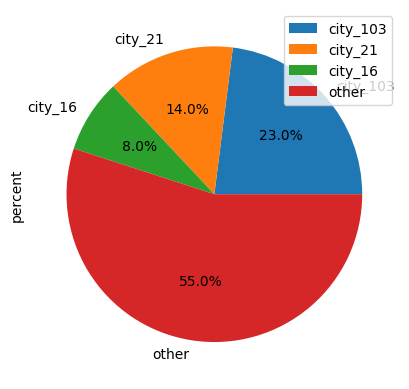

In [35]:
# Строим визуализацию
# Возьмем для примера круговую диаграмму 

printmd('# В каких городах живет большинство программистов ')
printmd('## На основании полученной информации мы видим что около 45% программистов живут в 3 городах ')
printmd('## Можем сделать предположения, что у этих 3 городов индекс города выше, чем у остальных, проверим это! ')

result.plot.pie(y='perсent', labels=result['city'], autopct='%1.1f%%')
result.style.hide().format(precision=0, thousands= ' ').highlight_max(color = 'orange', subset = 'perсent')


# Смотрим на индексы городов в которых живет большинство программистов 

In [36]:
df.city_development_index


0        0.920
1        0.776
2        0.624
3        0.789
4        0.767
         ...  
19153    0.878
19154    0.920
19155    0.920
19156    0.802
19157    0.855
Name: city_development_index, Length: 19158, dtype: float64

# Мы видим что количество программистов в городе напрямую влияет на то, сколько программистов живет в городе.

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


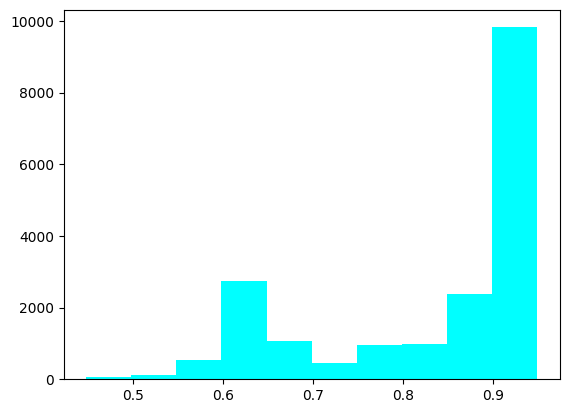

In [37]:
# Смотрим в разрезе развитости города где живет наибольшее число программистов


printmd('# Мы видим что количество программистов в городе напрямую влияет на то, сколько программистов живет в городе.')

df.city_development_index.hist(color = 'cyan', grid=False)
df.describe()


## Проверим гипотезу, что города 


city_103


city_21	


city_16


Имеют высокий индекс развития города

Для этого применим логическую индексацию

In [40]:
# Город city_103 обладает высоким уровнем развитости
df[df.city == 'city_103']['city_development_index'].mean()

np.float64(0.92)

In [41]:
# Город city_21 обладает уровнем развитости ниже среднего
df[df.city == 'city_21']['city_development_index'].mean()

np.float64(0.6239999999999999)

In [42]:
# Город city_16 обладает высоким уровнем развитости
df[df.city == 'city_16']['city_development_index'].mean()

np.float64(0.91)

### Делаем вывод что уровень развитости города влияет на то, сколько программистов в нем живет
### Однако, у нас есть city_21 где индекс ниже среднего.
### Проверим с чем это может быть связано

In [43]:
# 1 Проверим процент людей, которые хотят уволиться в данном городе
df.groupby(by=df.city)['target'].mean().reset_index(drop=False).query('city == "city_21"')

,city,target
64,city_21,0.591044


In [44]:
# Делаем вывод, что около 60% программистов из данного города хотят уволиться, посмотрим в рамках двух 2 городов обстоят дела с процентом людей которые хотят уволиться

In [45]:
df.groupby(by=df.city)['target'].mean().reset_index(drop=False).query('city == "city_103"')

,city,target
5,city_103,0.213088


In [46]:
df.groupby(by=df.city)['target'].mean().reset_index(drop=False).query('city == "city_16"')

,city,target
48,city_16,0.116765


### Основываясь на данные, делаем вывод, что в городе city_21, в котором, несмотря на, низкий индекс города, живет большое число программистов, наблюдается высокий уровень недовольства людьми их работы

In [51]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Смотрим сколько процентов людей и какого гендера хотят сменить работу.

### Основываясь на данные полученные выше, мы можем сделать вывод, что большиснтво программистов женского пола, хотят поменять работу.

,gender,count,mean
0,Female,1238,0.263328
1,Male,13221,0.227819
2,Other,191,0.261780
3,NaN,4508,0.308119


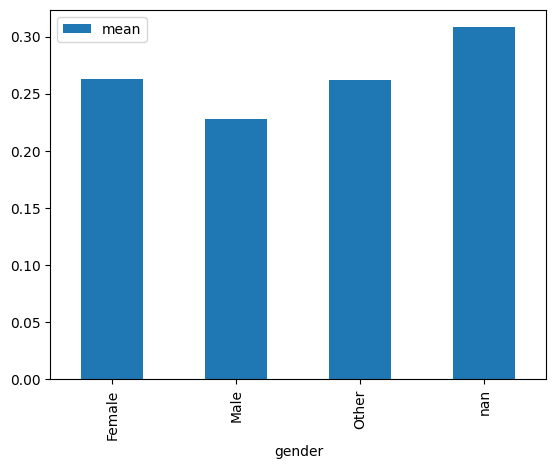

In [52]:
printmd('# Смотрим сколько процентов людей и какого гендера хотят сменить работу.')
printmd('### Основываясь на данные полученные выше, мы можем сделать вывод, что большиснтво программистов женского пола, хотят поменять работу.')

t = df.groupby(by = 'gender', dropna = False)['target'].agg(['count', 'mean']).reset_index(drop = False)

t.plot.bar(x = 'gender', y = 'mean')
df.groupby('gender', dropna = False)['target'].agg(['count', 'mean']).reset_index(drop = False)

# Посмотрим как уровень образования влияет на то, хотят люди увольнятся или нет .

## Можем сделаем вывод что большинство людей, которые хотят поменять работу, это люди со статусом образования Graduate

,education_level,count,mean
0,Graduate,11598,0.279790
1,High School,2017,0.195340
2,Masters,4361,0.214400
3,Phd,414,0.140097
4,Primary School,308,0.133117
5,NaN,460,0.226087


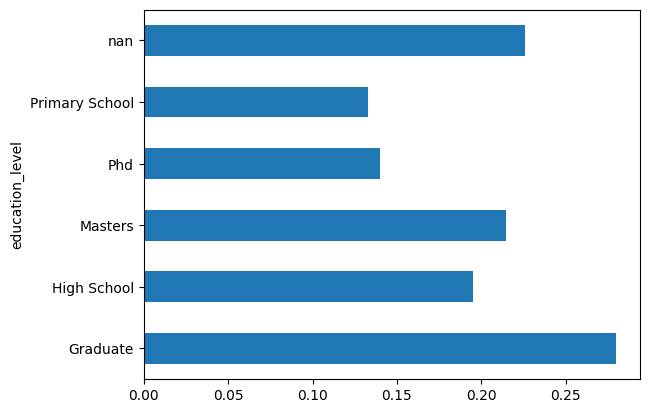

In [53]:
printmd('# Посмотрим как уровень образования влияет на то, хотят люди увольнятся или нет .')

printmd('## Можем сделаем вывод что большинство людей, которые хотят поменять работу, это люди со статусом образования Graduate')

df.groupby('education_level', dropna = False)['target'].mean().plot(kind = 'barh')
df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean']).reset_index(drop = False)

In [54]:
# Также можем проверить сколько людей и какого гендера получили какой уровень образования и какой процент в каждой группе хочет сменить работу
c = df.groupby(['gender','education_level'], dropna = False)['target'].agg(['count', 'mean'])
c

count      mean
gender education_level                 
Female Graduate           773  0.279431
       High School         67  0.268657
       Masters            339  0.247788
       Phd                 47  0.127660
       Primary School       4  0.250000
       NaN                  8  0.125000
Male   Graduate          8144  0.257122
       High School       1395  0.182796
       Masters           2957  0.191410
       Phd                280  0.132143
       Primary School     203  0.093596
       NaN                242  0.169421
Other  Graduate           112  0.330357
       High School         33  0.181818
       Masters             27  0.074074
       Phd                  4  0.250000
       Primary School       6  0.333333
       NaN                  9  0.222222
NaN    Graduate          2569  0.349552
       High School        522  0.220307
       Masters           1038  0.272640
       Phd                 83  0.168675
       Primary School      95  0.200000
       NaN                201  0.298507

# Наш вывод,что большинство людей, которые хотят поменять работу, это люди со статусом образования Graduate, оказался правдивым и в разрезе пола

# Последние 2 гипотезы, которые мы проверим будут связаны с тем, как company_size и experience влияет на желание сменить работу

# Смотрим как experience влияет на желание человека сменить работу.

## Основываясь на полученные результаты, мы делаем вывод, что опыт на прямую влияет на то хотят люди увольнятся или нет (Чем опыт ниже, тем с большей вероятностью люди хотят увольнятся).

array([[<Axes: title={'center': 'target'}>]], dtype=object)

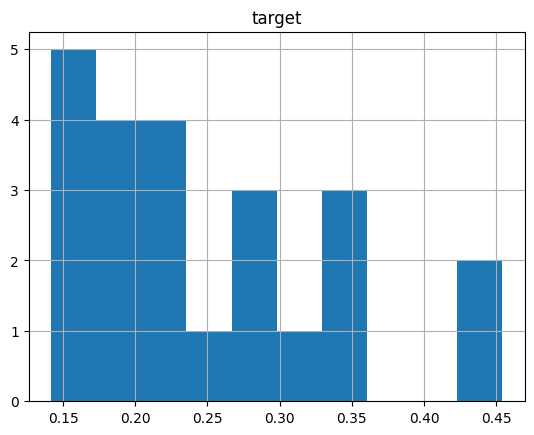

In [67]:
printmd('# Смотрим как experience влияет на желание человека сменить работу.')
printmd('## Основываясь на полученные результаты, мы делаем вывод, что опыт на прямую влияет на то хотят люди увольнятся или нет (Чем опыт ниже, тем с большей вероятностью люди хотят увольнятся).')


df1 = df.groupby('experience', dropna=False)['target'].mean().reset_index(drop=False).sort_values(by='target', ascending = False).reset_index(drop=True)
df1
df1.hist()

In [73]:
df1.loc[0:5]

,experience,target
0,<1,0.454023
1,1,0.424408
2,NaN,0.353846
3,3,0.353028
4,2,0.331854
5,4,0.325731


# Как company_size влияет на то, сколько сотрудников хотят уволиться.

## Основываясь на результат, который мы получили при группировке и агрегации можно сделать вывод, что company_size никак не влияет на процент увольнений .

,company_size,target
0,NaN,0.405861
1,10/49,0.233855
2,10000+,0.190688
3,5000-9999,0.181172
4,50-99,0.176776
5,500-999,0.173318
6,<10,0.171254
7,100-500,0.161416
8,1000-4999,0.150602


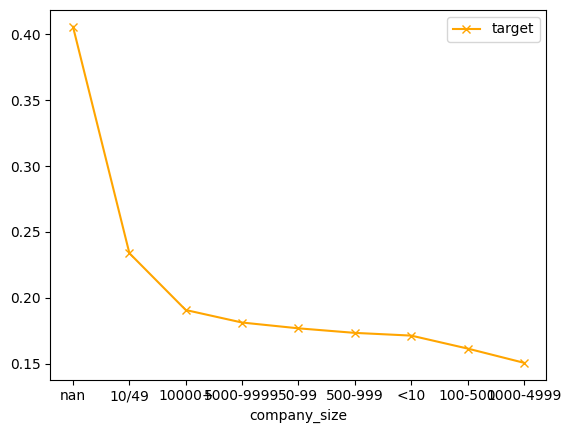

In [56]:
printmd('# Как company_size влияет на то, сколько сотрудников хотят уволиться.')

printmd('## Основываясь на результат, который мы получили при группировке и агрегации можно сделать вывод, что company_size никак не влияет на процент увольнений .')


df2 = df.groupby(by='company_size', dropna=False)['target'].mean().reset_index(drop=False).sort_values(by='target', ascending=False).reset_index(drop=True)
df2.plot.line(x = 'company_size', y = 'target', color = 'orange', marker = 'x')
df2